<a href="https://colab.research.google.com/github/alisanyalcinn/Melbourne-House-Price-Prediction/blob/main/Melbourne_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("melb_data.csv")

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df.shape

(13580, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


There are 62 missing values in Car, 6450 missing values in BuildingArea, 5375 missing values in YearBuilt and 1369 missing values in CouncilArea columns. Data needs cleaning before starting model training and analysis.

In [ ]:
duplicates = df[df.duplicated()]
duplicates


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


There are no duplicated values therefore no need to perform data cleaning for duplicated values.

In [ ]:
df.rename(columns={"Lattitude": "Latitude", "Longtitude": "Longitude"}, inplace=True)

from scipy.spatial.distance import cdist
from collections import defaultdict


def fill_missing_yearbuilt(df):

    coordinates = df[["Latitude", "Longitude"]].values
    dist_matrix = cdist(coordinates, coordinates)


    closest_neighbors = defaultdict(list)
    for i, distances in enumerate(dist_matrix):
        sorted_indices = distances.argsort()[1:6]
        closest_neighbors[i] = sorted_indices


    for i, row in df[df["YearBuilt"].isnull()].iterrows():
        neighbor_indices = closest_neighbors[i]
        neighbor_years = df.iloc[neighbor_indices]["YearBuilt"]
        avg_year = neighbor_years.mean()
        df.at[i, "YearBuilt"] = avg_year

    return df


Since close buildings can have similar ages, I tried to attend null values to ages of locationaly close houses.

In [ ]:
df = fill_missing_yearbuilt(df)
df.head()
null_values = df.isnull().sum()
null_values

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [ ]:
df.dropna(subset=["YearBuilt"], inplace=True)
df.dropna(subset=["Car"], inplace=True)


In [ ]:
mean_value_BA = df['BuildingArea'].mean()
variance_value_BA = df['BuildingArea'].var()
std_dev_BA = np.sqrt(variance_value_BA)
print("Mean:", mean_value_BA)
print("Standard Deviation:", std_dev_BA)


Mean: 152.1562676010706
Standard Deviation: 542.1831781990263


In [ ]:
missing_count_BA = df['BuildingArea'].isnull().sum()
simulated_values = np.random.normal(loc=mean_value_BA, scale=std_dev_BA, size=missing_count_BA)
df.loc[df['BuildingArea'].isnull(), 'BuildingArea'] = simulated_values


In [ ]:
df.drop(columns=['CouncilArea'], inplace=True)

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
categorical_df = df.select_dtypes(exclude=['number'])


I wanted to separete numeric and categorical columns so I can check the correlation matrix between numerical values.

In [ ]:
numerical_df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,739.727276,1900.0,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,639.122311,1950.5,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,-37.8072,144.9941,4019.0


In [ ]:
correlation_matrix = numerical_df.corr()


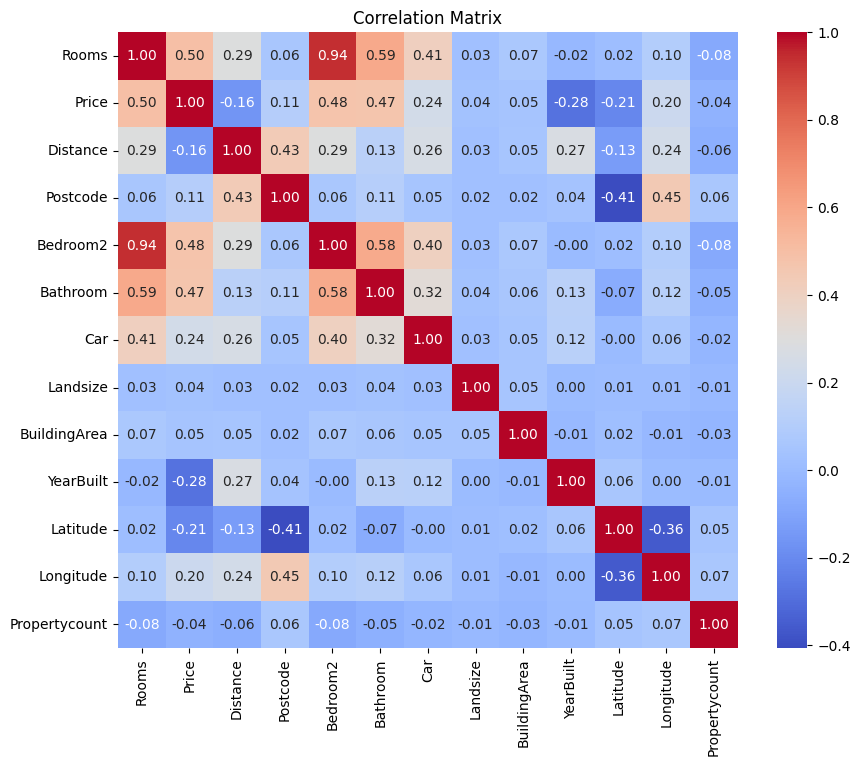

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Columns 'Rooms', 'Bedroom2', 'Bathroom' and 'Year Built' has the highest corellation with price. Those columns will play an important role in model training. Columns like 'Landsize', 'BuildingArea' and 'PropertyCount' has the smallest correlation with price. This low correlation can make a negative impact on my model training so I am planning to leave these columns out of my models.

Text(0.5, 1.0, 'Housing value depending on their spatial location')

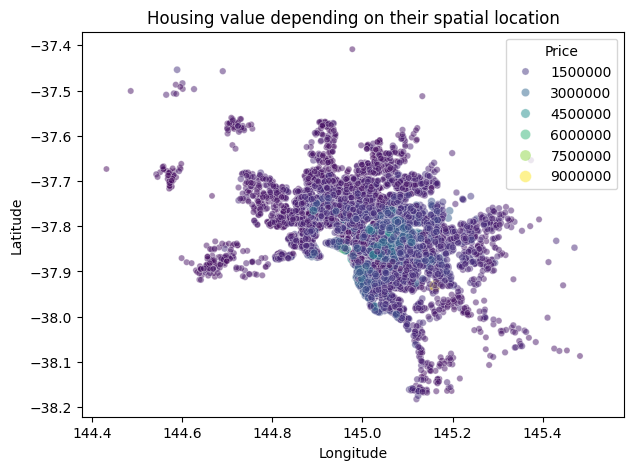

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x="Longitude",y="Latitude",hue="Price",size="Price",palette="viridis",alpha=0.5)
plt.legend(title="Price",loc="upper right")
plt.title("Housing value depending on their spatial location")

I wanted to see what kind of impact location has on the house price. Looking that graph coastal region and central region have highest prices.

In [ ]:
distinct_values = categorical_df.nunique()
distinct_values

,0
Suburb,314
Address,13290
Type,3
Method,5
SellerG,268
Date,58
Regionname,8


My plan is converting categorical values into numerical values using one hot encoding or similar algorithms. Since every distinct value will create a new column I am planning to convert only 'Type','Method', 'Regionname' columns. Other columns will remain categorical and unfortinaly I could not be able to use those columns in numeric analysis or numeric model trainings.

In [ ]:
avg_price_per_type = df.groupby('Type')['Price'].mean()
print("Average price for each type:")
print(avg_price_per_type)


Average price for each type:
Type
h    1.242802e+06
t    9.337351e+05
u    6.052525e+05
Name: Price, dtype: float64


I will attend weighted numbers to categories to use in my regression models.

In [ ]:
mapping = {'h': 1, 't': 9, 'u': 6}
df['Type_num'] = df['Type'].map(mapping)

In [ ]:
avg_price_per_type = df.groupby('Method')['Price'].mean()
print("Average price for each type:")
print(avg_price_per_type)


Average price for each type:
Method
PI    1.133189e+06
S     1.086851e+06
SA    1.026165e+06
SP    8.998545e+05
VB    1.165537e+06
Name: Price, dtype: float64


In [ ]:
mapping = {'PI': 113, 'S': 108, 'SA': 102, 'SP':899, 'VB': 116}
df['Method_num'] = df['Method'].map(mapping)

In [ ]:
avg_price_per_type = df.groupby('Regionname')['Price'].mean()
print("Average price for each type:")
print(avg_price_per_type)


Average price for each type:
Regionname
Eastern Metropolitan          1.104283e+06
Eastern Victoria              6.999808e+05
Northern Metropolitan         8.963862e+05
Northern Victoria             5.947000e+05
South-Eastern Metropolitan    9.224634e+05
Southern Metropolitan         1.373162e+06
Western Metropolitan          8.667916e+05
Western Victoria              3.975234e+05
Name: Price, dtype: float64


In [ ]:
mapping = {'Eastern Metropolitan': 110, 'Eastern Victoria': 699, 'Northern Metropolitan': 899, 'Northern Victoria': 590, 'South-Eastern Metropolitan': 922,'Southern Metropolitan':137,'Western Metropolitan':866, 'Western Victoria': 397 }
df['Region_num'] = df['Regionname'].map(mapping)

In [ ]:
numerical_columns2 = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns2 = df.select_dtypes(include=['object']).columns
df_num2 =df[numerical_columns2]
df_cat2 = df[categorical_columns2]
df_num2.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,Type_num,Method_num,Region_num
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,739.727276,1900.0,-37.7996,144.9984,4019.0,1,108,899
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,-37.8079,144.9934,4019.0,1,108,899
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,-37.8093,144.9944,4019.0,1,899,899
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,639.122311,1950.5,-37.7969,144.9969,4019.0,1,113,899
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,-37.8072,144.9941,4019.0,1,116,899


In [ ]:
correlation_matrix2 = df_num2.corr()


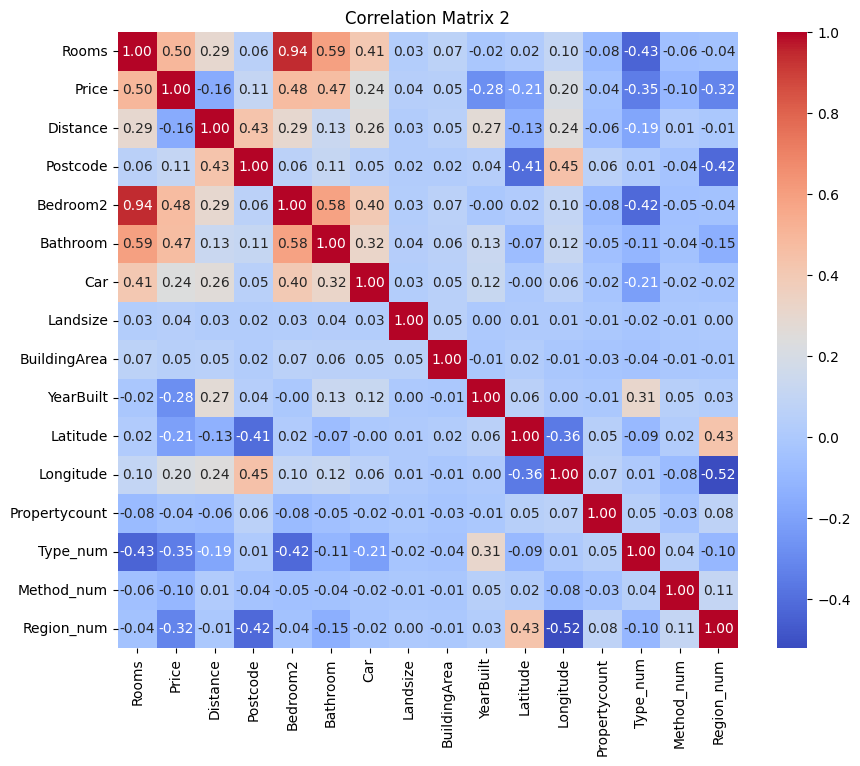

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix 2')
plt.show()

In [ ]:
df_lr = df_num2.drop(columns=['Landsize','BuildingArea','Propertycount'])

# **Model Training**

**Lineer Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [ ]:
X=df_lr.drop(columns=['Price'])
y=df_lr['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 146466316241.51508
R^2 Score: 0.5924403224503576


Lineer Regression model has a low accuracy. Performance of model can be improved customizing the leaning rate.

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [ ]:
rf_model.score(X_test,y_test)

0.7292712672928242

**XG Boost**

In [ ]:
from xgboost import XGBRegressor


In [ ]:
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [ ]:
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
r22 = r2_score(y_test, y_pred)
print("R^2 Score:", r22)

R^2 Score: 0.721352640226383
